# Introduction to Thermodynamics and Statistical Physics

In this lecture, we are going to discuss:

* Functions of state of an ideal gas.
* The Maxwell-Boltzmann distribution.

## Functions of state of an ideal gas

So now that we know how to calculate the partition function for N indistinguishable particles, let's apply the techniques we have developed to understand an ideal gas. The partition function for N particles in a gas is
$$
    Z_N = \frac{1}{N!} \left( \frac{V}{\lambda_{\rm th}^3}\right)^N
$$
Using the expression for $\lambda_{\rm th}$, we then get that
$$
    Z_N = \frac{1}{N!} V^N \left( \frac{ 2\pi m k_{\rm B} T}{h^2}\right)^{3N/2}
$$
This means that
$$
    \ln{Z_N} = N \ln{V} + \frac{3}{2} N \ln{T} + C
$$
The internal energy is then given by
$$
    U = -\frac{\partial \ln Z_N}{\partial \beta} = k_{\rm B} T^2 \frac{\partial \ln Z_N}{\partial T} = \frac{3}{2}N k_{\rm B}T
$$
The Helmholtz free energy is
$$
    F = -k_{\rm B} T \ln Z_N = -k_{\rm B} T N \ln{V} -k_{\rm B} T \frac{3}{2} N \ln{T} -k_{\rm B} T C
$$
such that if we use (from Lecture 7)
$$
    P = -\left( \frac{\partial F}{\partial V} \right)_T = \frac{N k_{\rm B} T}{V}
$$
which is the equation of state for an ideal gas!
In order to work out the other thermodynamic quantities, we need to be a bit more careful with those constants in earlier equations. Returning to the partition function, we can write it instead as.
$$
    \ln{Z_N} = N \ln{V} - 3 N \ln {\lambda_{\rm th}} - N \ln N + N
$$
after using Stirlings approximation of $\ln{N!} \sim N\ln {N} - N$. This further simplifies to
$$
    \ln{Z_N} = N \ln \left(\frac{V {\rm e} }{N \lambda_{\rm th}^3}\right)
$$
and so the Helmholtz free energy is given by
\begin{align}
    F &= -N k_{\rm B} T \ln \left(\frac{V {\rm e} }{N \lambda_{\rm th}^3}\right)\\
      &= N k_{\rm B} T[ \ln (n \lambda_{\rm th}^3)-1]
\end{align}
from which all other thermodynamic quantities of an ideal gas can be derived.

## The Maxwell Boltzmann Distribution

The next question we want to ask is, given a gas at a certain temperature, what is the distribution of particle velocities within that gas?

First, we will ignore all rotational or vibrational energies associated with any particles (that is, we will assume a monatomic gas where the energy only arises due to translational motion of the particles, see Lecture 9). As such, the energy of a single particle can be written as
$$
    \epsilon = \frac{p^2}{2m}
$$
The probability that a particle is in a particular state $s$ with translational energy $\epsilon$ is then given by
$$
    P_s = \frac{1}{Z_1}e^{-\beta \epsilon}
$$
If the gas consisits of $N$ particles, the mean number $\bar{n}_s$ of particles which are in the translational state $s$ is given by
$$
    \bar{n}_s = NP_s
$$
Now, substituting for $Z_1$ and $\epsilon$ then gives
$$
    \bar{n}_s(p) = \frac{\hbar^3 N}{V} \left(\frac{2\pi}{mk_{\rm B}T}\right)^{3/2} \exp \left( \frac{- p^2}{2mk_{\rm B}T} \right)
$$
We now need to figure out what the appropriate expression is for particles which have momenta between ${\bf p}$ and ${\bf p}+{\rm d}{\bf p}$. Fortunately, we can get this from the density of states equation
$$
    g(k){\rm d}k = \frac{V k^2 {\rm d} k}{2\pi^2}
$$
and using the relation that $p=\hbar k$. This gives 
$$
    f(p){\rm d}p = \frac{V p^2 }{2\pi^2 \hbar^3} {\rm d} p
$$
This means that the probability that a particle will possess a momentum with magnitude between ${\bf p}$ and ${\bf p}+{\rm d}{\bf p}$ is given by
$$
    P(p)dp = \frac{1}{N} f(p) \; dp \;\bar{n}(p)
$$
Plugging in our above expressions thus gives
$$
    P(p)dp = \frac{4\pi p^2}{(2 \pi m k_{\rm B} T)^{3/2}} \exp \left(\frac{- p^2}{2mk_{\rm B}T}\right) dp
$$
The normalisation for this equation is the condition that
$$
    \int_{0}^{\infty} P(p)dp = 1
$$
So, what does this equation tell us? If we let $p=mv$, then the expression above becomes
$$
    P(v)dv = 4\pi v^2\left( \frac{m}{2 \pi k_{\rm B} T}\right)^{3/2} \exp \left(\frac{- mv ^2}{2k_{\rm B}T}\right) dv
$$
which, if we then let $u=v / \left(\frac{2 k_{\rm B} T}{m}\right)^{1/2}$, becomes 
$$
    P(u)du = \frac{4}{\sqrt{\pi}} u^2 \exp (-u^2) du = F_1(u) du
$$
This equation describes a Maxwell velocity distribution, and is plotted below.

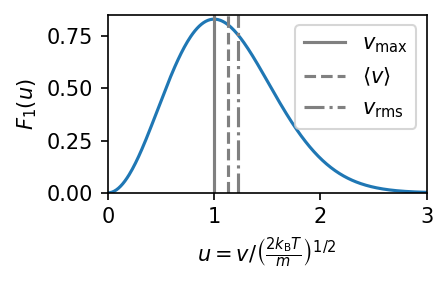

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u = np.arange(0,3,0.01) #in units of eps
F = 4/ np.pi**(1/2) * u**2 * np.exp(-u**2)

fig, ax = plt.subplots(ncols=1,figsize=[3,2],dpi=150)
ax.plot(u,F)
ax.set_xlabel(r"$u = v / \left(\frac{2 k_{\rm B} T}{m}\right)^{1/2}$")
ax.set_ylabel(r"$F_1(u)$")
ax.set_xlim(0,3)
ax.set_ylim(0,0.85)
ax.axvline(1,linestyle='-',color='grey',label=r'$v_{\rm max}$')
ax.axvline(2/np.sqrt(np.pi),linestyle='--',color='grey',label=r'$\langle v \rangle$')
ax.axvline(np.sqrt(3/2),linestyle='-.',color='grey',label=r'$v_{\rm rms}$')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Maxwell_Distribution.png")
plt.show()

First, the maximum of the distribution occurs at

$$
    v_{\rm max}=\left(\frac{2 k_{\rm B} T}{m}\right)^{1/2}
$$

Now, the mean value for the velocity, $\langle v \rangle$, can be found using
$$
    \langle u \rangle = \int_0^\infty u P(u) du = \frac{4}{\sqrt{\pi}} \int_0^\infty u^3 e^{-u^2} du
$$
That last term is a known intergral, and is $\int_0^\infty u^3 e^{-u^2} du = \frac{1}{2}$. This gives
$$
    \langle u \rangle = \frac{2}{\sqrt{\pi}}
$$
which, substituting in for $\langle v \rangle$, gives
$$
    \langle v \rangle = \left(\frac{8 k_{\rm B} T}{\pi m}\right)^{1/2} = \frac{2}{\sqrt{\pi}} v_{\rm max}
$$
The mean value for the squared-velocity can be found using a similar procedure, and gives
$$
    \langle v^2 \rangle = \frac{3 k_{\rm B} T}{m}
$$
which means the root-mean-square (RMS) of the velocity is
$$
    v_{\rm RMS} = \sqrt{\langle v^2 \rangle} = \sqrt{\frac{3 k_{\rm B} T}{ m}} = \sqrt{\frac{3}{2}} v_{\rm max}
$$
This means that $v_{\rm max} \langle \langle v \rangle\langle v_{\rm RMS}$ - so the velocity which has the highest probability of occuring is lower than the mean velocity, which is lower than the RMS velocity. This is because the long tail to our distribution. Remembering this is important when discussing the kinematics of gases (to come next year)
This means that the average kinetic energy of a particle in this gas is
$$
    \langle E \rangle= \frac{1}{2} m \langle v^2 \rangle= \frac{3}{2} k_{\rm B} T
$$
in agreement with our previous result for the an ideal gas (if we multiple this by N particles).